In [1]:
# Subir el archivo CSV desde tu computadora
from google.colab import files
uploaded = files.upload()

# Importar pandas y leer el archivo CSV
import pandas as pd

# Obtén el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_name)

# Muestra las primeras filas del DataFrame
df.head()

Saving Online-eCommerce.csv to Online-eCommerce.csv


Order_Number State_Code   Customer_Name  Order_Date     Status  \
0      139374.0         AP     Adhir Samal  11/01/2020  Delivered   
1      139375.0         AP  Dannana Jhammi  11/01/2020  Delivered   
2      139376.0         AS     Vipin Kumar  11/01/2020  Delivered   
3      139377.0         BR   Ranjeet Kumar  11/01/2020  Delivered   
4      139378.0         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150.0        Roshan Kumar  
2       2.0     14000.0      18200.0         Aarvi Gupta  
3       3.0     19650.0      25545.0         Vijay Singh  
4       4.0     30600.0      39780.0          Aadil Khan

In [2]:
df.shape

(5110, 14)

In [3]:
df.dtypes

Order_Number           float64
State_Code              object
Customer_Name           object
Order_Date              object
Status                  object
Product                 object
Category                object
Brand                   object
Cost                   float64
Sales                  float64
Quantity               float64
Total_Cost             float64
Total_Sales            float64
Assigned Supervisor     object
dtype: object

El dataset contiene 14 columnas y 5110 registros, pero algunos registros tienen valores nulos. La columna Order_Date está en formato texto y necesita ser convertida a formato datetime para el análisis de series temporales

In [4]:
#Convertir Order_date a datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

In [5]:
#Eliminar filas con fechas nulas
df = df.dropna(subset=['Order_Date'])
df.head()

Order_Number State_Code   Customer_Name Order_Date     Status  \
0      139374.0         AP     Adhir Samal 2020-01-11  Delivered   
1      139375.0         AP  Dannana Jhammi 2020-01-11  Delivered   
2      139376.0         AS     Vipin Kumar 2020-01-11  Delivered   
3      139377.0         BR   Ranjeet Kumar 2020-01-11  Delivered   
4      139378.0         CG   Sajal Singhal 2020-01-11      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150.0        Roshan Kumar  
2       2.0     14000.0      18200.0         Aarvi Gupta  
3       3.0     19650.0      25545.0         Vijay Singh  
4       4.0     30600.0      39780.0          Aadil Khan

In [6]:
# Agrupar por 'Order_Date' y sumar 'Total_Sales'
df_daily_sales = df.groupby('Order_Date')['Total_Sales'].sum().reset_index()

# Establecer 'Order_Date' como índice
df_daily_sales.set_index('Order_Date', inplace=True)

# Mostrar las primeras filas del DataFrame agrupado
print(df_daily_sales.head())


            Total_Sales
Order_Date             
2020-01-11     131430.0
2020-01-12       1690.0
2020-01-13       9750.0
2020-01-14      39000.0
2020-01-15      13650.0


In [7]:
# Definir la fecha de referencia (el primer día en el conjunto de datos)
reference_date = df['Order_Date'].min()

# Crear una nueva columna 'Days' que contiene el número de días desde la fecha de referencia
df['Days'] = (df['Order_Date'] - reference_date).dt.days

df.head()


Order_Number State_Code   Customer_Name Order_Date     Status  \
0      139374.0         AP     Adhir Samal 2020-01-11  Delivered   
1      139375.0         AP  Dannana Jhammi 2020-01-11  Delivered   
2      139376.0         AS     Vipin Kumar 2020-01-11  Delivered   
3      139377.0         BR   Ranjeet Kumar 2020-01-11  Delivered   
4      139378.0         CG   Sajal Singhal 2020-01-11      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  Days  
0       1.0      6500.0       8450.0         Ajay Sharma     0  
1       3.0     25500.0      33150.0        Roshan Kumar     0  
2       2.0     14000.0      18200.0         Aarvi Gupta     0  
3       3.0     19650.0      25545.0         Vijay Singh     0  
4       4.0     30600.0      39780.0          Aadil Khan     0

In [18]:

# Agrupar por 'Days' y sumar 'Total_Sales'
df_daily_sales = df.groupby('Days')['Total_Sales'].sum().reset_index()

# Establecer 'Days' como índice
df_daily_sales.set_index('Days', inplace=True)

# Mostrar las primeras filas del DataFrame agrupado
print(df_daily_sales.head())

      Total_Sales
Days             
0        131430.0
1          1690.0
2          9750.0
3         39000.0
4         13650.0


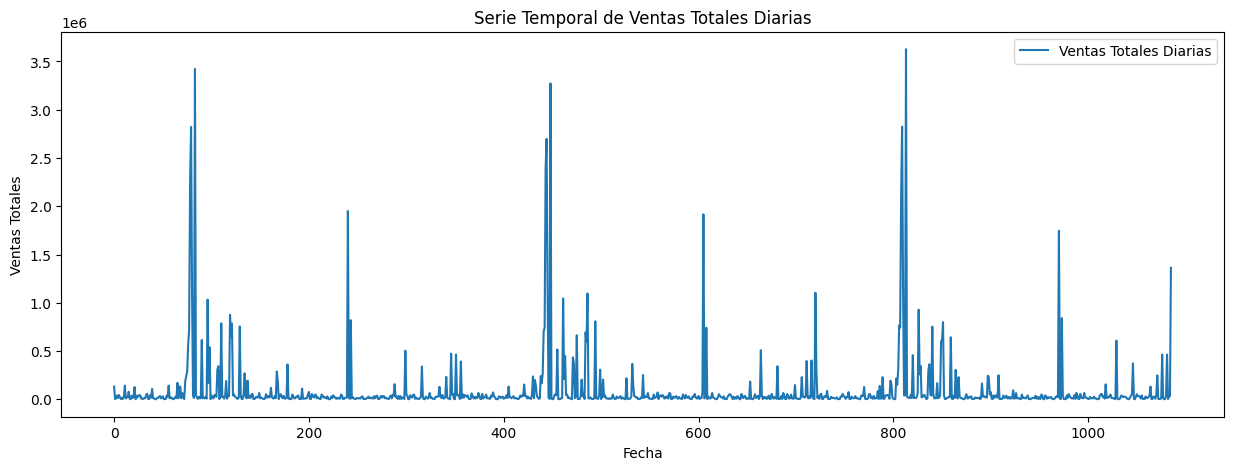

In [9]:
# Visualización de la serie temporal

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df_daily_sales, label='Ventas Totales Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.title('Serie Temporal de Ventas Totales Diarias')
plt.legend()
plt.show()


**MODELO** **SARIMAX**

Se va a usar un Modelo Sarimax para predecir las ventas

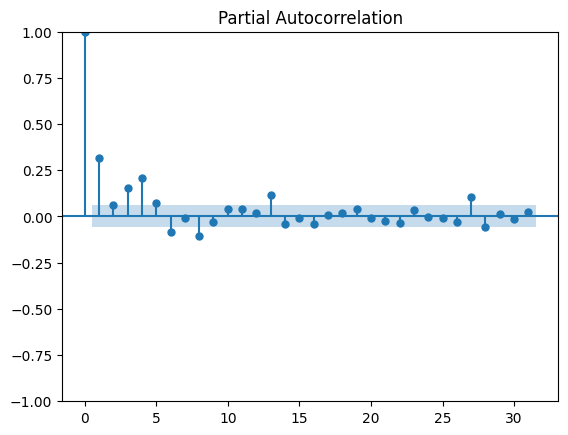

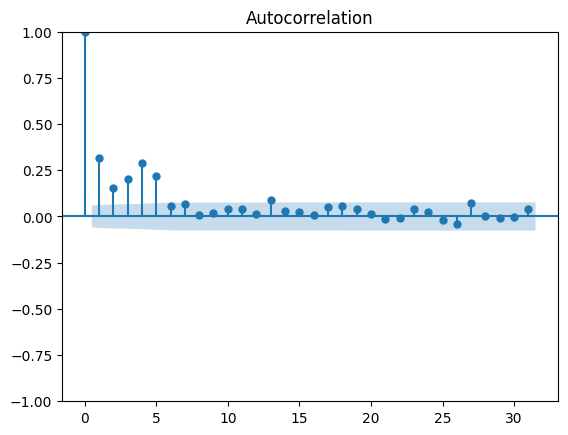

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

plot_pacf(df_daily_sales)
plot_acf(df_daily_sales)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


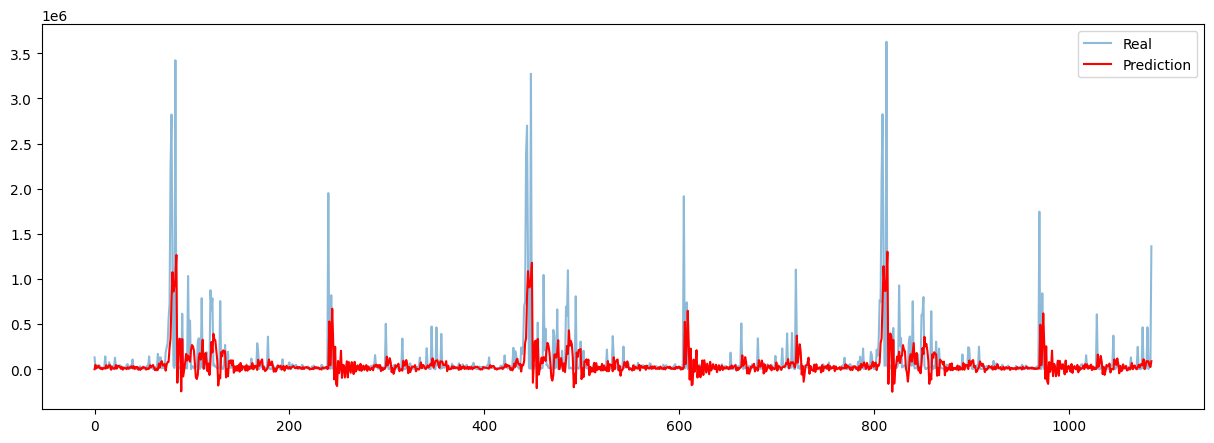

In [27]:
model = SARIMAX(df_daily_sales, order=(6, 0, 5), seasonal_order=(1, 0, 1, 12))
results = model.fit()

ax, fig = plt.subplots(figsize = (15, 5))
plt.plot(df_daily_sales, alpha=0.5, label='Real')
plt.plot(results.fittedvalues, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

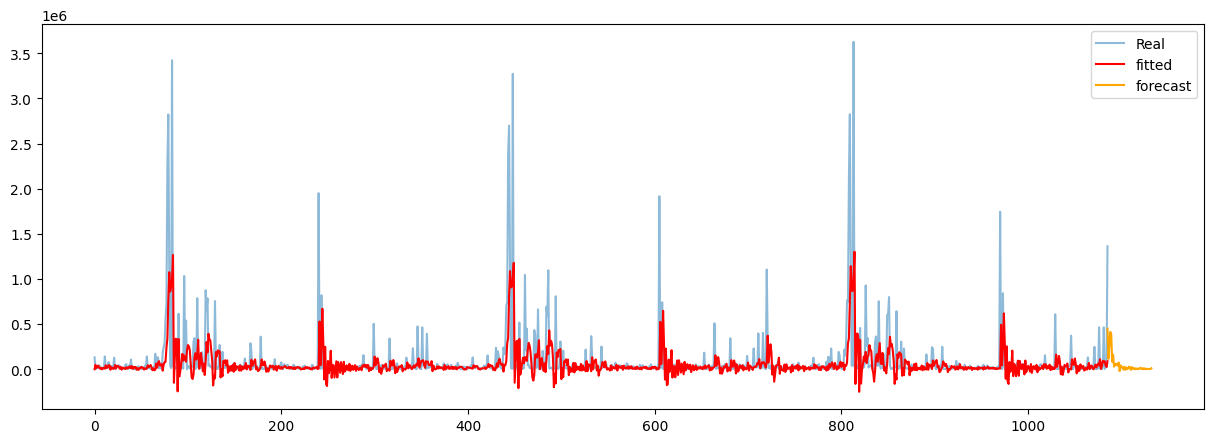

In [28]:
TEST_SIZE = 48

ax, fig = plt.subplots(figsize = (15, 5))
plt.plot(df_daily_sales, alpha=0.5, label='Real')
plt.plot(results.fittedvalues, color = 'red', label = 'fitted')
plt.plot(range(1085, 1133), results.forecast(TEST_SIZE), color = 'orange', label = 'forecast')

plt.legend()
plt.show()
